In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_csv('Data/data.csv')
df=df[df.columns[1:-1]]

In [37]:
def graficaEspacio(data1,data2,data3,diagnostico,titulos):
  positivo = [data1[diagnostico==1],data2[diagnostico==1],data3[diagnostico==1]]
  negativo = [data1[diagnostico==0],data2[diagnostico==0],data3[diagnostico==0]]
  fig=plt.figure()
  fig.set_figwidth(9)
  fig.set_figheight(9)
  ax1 = fig.add_subplot(111, projection='3d')
  ax1.set_xlabel(titulos[0])
  ax1.set_ylabel(titulos[1])
  ax1.set_zlabel(titulos[2])
  ax1.scatter(positivo[0],positivo[1],positivo[2], c='g', marker='o',alpha=0.3)
  ax1.scatter(negativo[0],negativo[1],negativo[2], c='r', marker='o',alpha=0.3)
  # Mostramos el gráfico
  plt.show()

In [69]:
def normalizacion(x):
    minimo=np.min(x)
    maximo=np.max(x)
    x=(x-minimo)/(maximo-minimo)

    return x

In [118]:
from sklearn.metrics import confusion_matrix
def evaluacionModelo(y,prediccion):
    confmat=confusion_matrix(y,prediccion)
    ig, ax = plt.subplots(figsize=(10,5))
    ax.matshow(confmat)
    plt.title("Matriz de confusión",fontsize=20)
    plt.ylabel("Etiqueta verdadera")
    plt.xlabel("Predicción")
    for (i,j),z in np.ndenumerate(confmat):
        ax.text(j,i,"{}".format(z),ha='center',va='center',color='gray')
    plt.show()
    print("Exactitud {:.2f}%".format(100-np.mean(np.abs(prediccion- y)*100)))

In [42]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [43]:
df['diagnosis']=(df['diagnosis']=='M')*1

## Correlation Matrix

<AxesSubplot:title={'center':'Correlation Matrix'}>

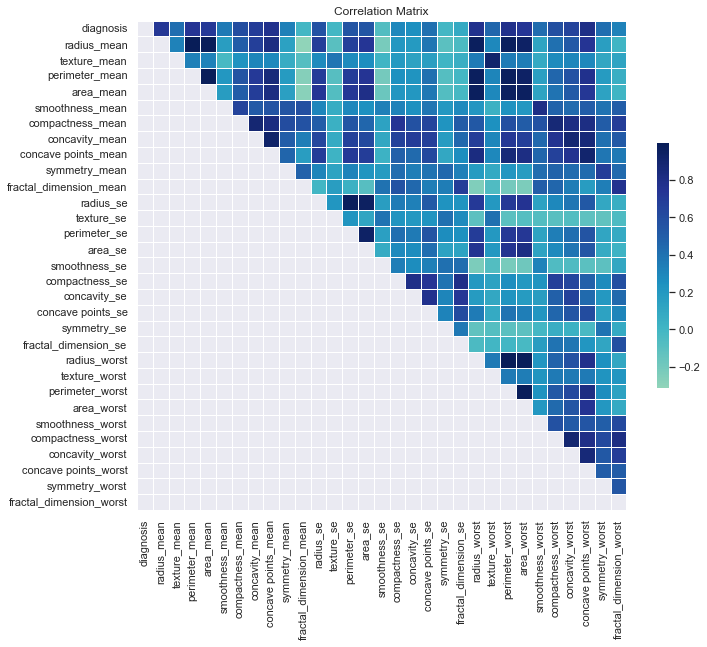

In [44]:
sns.set_theme(style="dark")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)).T
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title("Correlation Matrix")
# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [45]:
selection=[j for j in df.corr()['diagnosis'].index if np.abs(df.corr()['diagnosis'][j])>=0.5  ]

In [46]:
datos=df[selection]

In [47]:
datos.columns

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

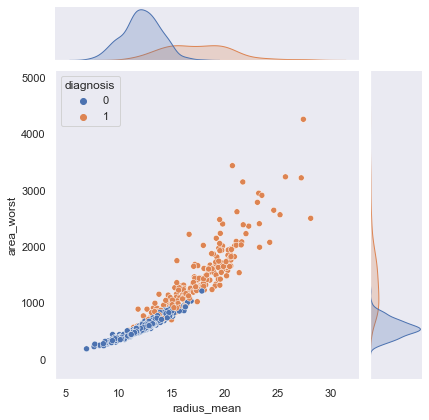

In [48]:
sns.jointplot(data=datos, x="radius_mean", y="area_worst",hue="diagnosis")

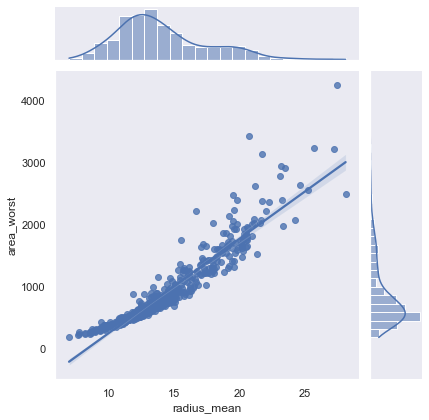

In [49]:
sns.jointplot(data=datos, x="radius_mean", y="area_worst", kind="reg")

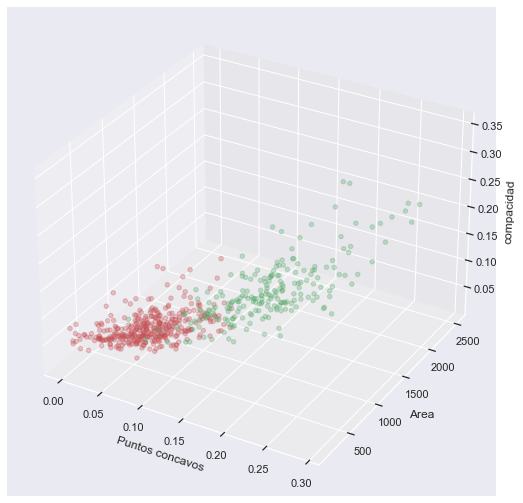

In [50]:
graficaEspacio(datos['concave points_worst'],datos['area_mean'],datos['compactness_mean'],datos['diagnosis'],["Puntos concavos ","Area","compacidad"])

<AxesSubplot:title={'center':'Correlation Matrix'}>

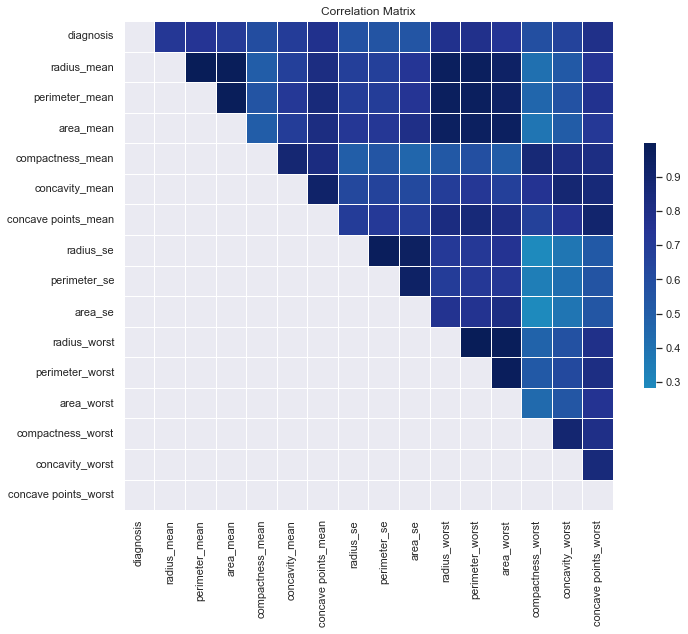

In [51]:
sns.set_theme(style="dark")
corr = datos.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)).T
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title("Correlation Matrix")
# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [52]:
from sklearn.model_selection import train_test_split 

In [53]:
train, test = train_test_split(df, test_size = 0.30)

In [54]:
train.shape

(398, 31)

In [55]:
test.shape

(171, 31)

In [75]:
x_train,y_train =normalizacion(train.drop(columns='diagnosis')),train['diagnosis']

/home/silverwolf/anaconda3/envs/Datascience/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/silverwolf/anaconda3/envs/Datascience/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [76]:
x_test,y_test=normalizacion(test.drop(columns='diagnosis')),test['diagnosis']

/home/silverwolf/anaconda3/envs/Datascience/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/silverwolf/anaconda3/envs/Datascience/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [77]:
from sklearn.linear_model import LogisticRegression

In [108]:
clf=LogisticRegression(C=1.2,max_iter=1000,tol=1e-10)

In [109]:
clf.fit(x_train,y_train)

LogisticRegression(C=1.2, max_iter=1000, tol=1e-10)

In [110]:
score=clf.score(x_test,y_test)
print("La precisión es del {:.2f}%".format(score*100))

La precisión es del 91.23%


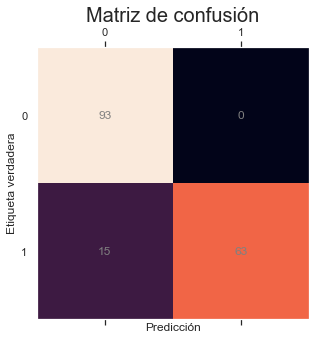

Exactitud 91.23%


In [119]:
evaluacionModelo(y_test,clf.predict(x_test))